# ME6324 - Predicting the filament in 3D Printing


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.metrics import classification_report,r2_score

In [12]:
data = pd.read_csv('data.csv')

data.infill_pattern=[0 if i =='grid' else 1 for i in data.infill_pattern]
data.material=[0 if i =='abs' else 1 for i in data.material]

train,test = train_test_split(data,test_size = 0.25,train_size=0.75,random_state=100,shuffle=True)

In [13]:
data.head()

,layer_height,print_speed,fan_speed,bed_temperature,nozzle_temperature,infill_density,wall_thickness,roughness,strength,infill_pattern,material
0,0.02,40,100,80,220,24,10,10,10,1,1
1,0.06,60,65,73,237,60,5,155,13,1,0
2,0.20,40,45,69,209,53,4,262,262,1,1
3,0.06,60,80,76,242,69,16,179,11,0,0
4,0.20,40,70,74,214,44,6,240,27,0,1


In [14]:
data.describe()

,layer_height,print_speed,fan_speed,bed_temperature,nozzle_temperature,infill_density,wall_thickness,roughness,strength,infill_pattern,material
count,320.000000,320.000000,320.000000,320.000000,320.00000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,0.106000,64.000000,50.000000,70.000000,221.25000,51.059375,8.646875,170.368750,59.896875,0.500000,0.509375
std,0.063849,29.439913,26.261287,5.252257,13.13661,13.036225,4.907003,88.757365,74.894902,0.500783,0.500695
min,0.020000,40.000000,0.000000,60.000000,200.00000,17.000000,2.000000,2.000000,5.000000,0.000000,0.000000
25%,0.060000,40.000000,30.000000,66.000000,210.00000,42.000000,5.000000,95.000000,16.000000,0.000000,0.000000
50%,0.100000,60.000000,50.000000,70.000000,220.00000,50.000000,7.000000,178.500000,23.000000,0.500000,1.000000
75%,0.150000,60.000000,70.000000,74.000000,231.25000,60.000000,14.000000,244.250000,68.750000,1.000000,1.000000
max,0.200000,120.000000,100.000000,80.000000,250.00000,86.000000,18.000000,359.000000,286.000000,1.000000,1.000000


## Decision Tree Classifier

In [15]:
model  = DecisionTreeClassifier(random_state=0,min_samples_leaf=20)

features = list(train.columns)
features.remove('material')
X = train.loc[:,features]
y = train['material'] # pla = 1; abs = 0

model.fit(X,y)

DecisionTreeClassifier(min_samples_leaf=20, random_state=0)

In [16]:
X_test = test.loc[:,features]
y_test = test.material

output=model.predict_proba(X_test)

y_pred = model.predict(X_test)

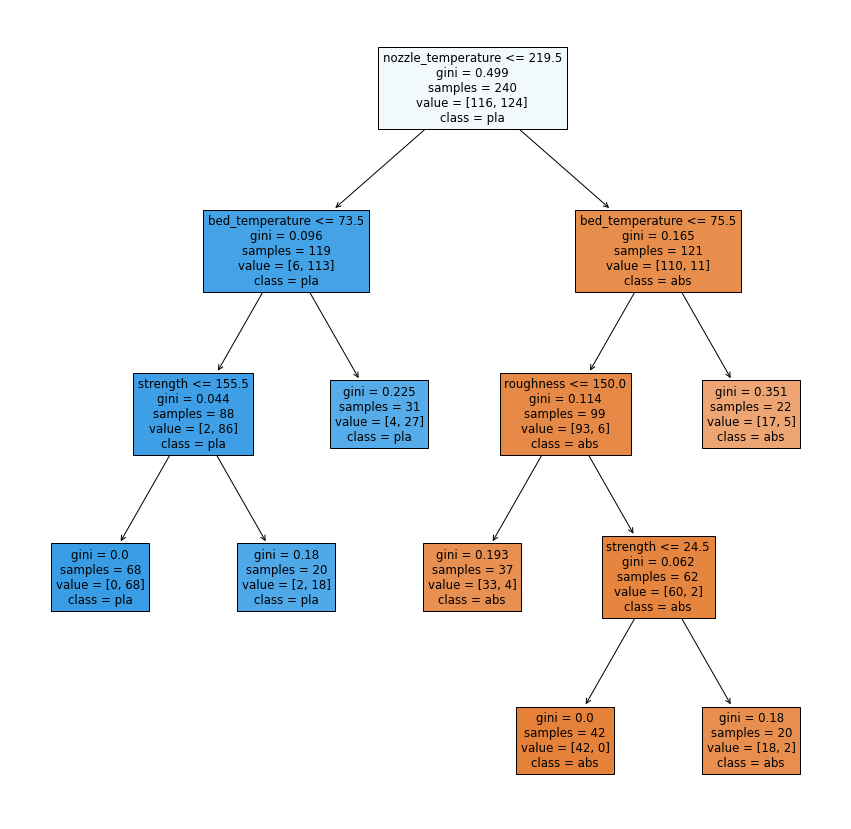

In [17]:
# Visualisation with Decision Tree
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(model, 
                   feature_names=X.columns,  
                   class_names=['abs','pla'],
                   filled=True)
plt.show()

## Random Forest Classifier

In [18]:
model = RandomForestClassifier(random_state=0,min_samples_leaf=10)
model.fit(X,y)
y_pred = model.predict(X_test)
output=model.predict_proba(X_test)

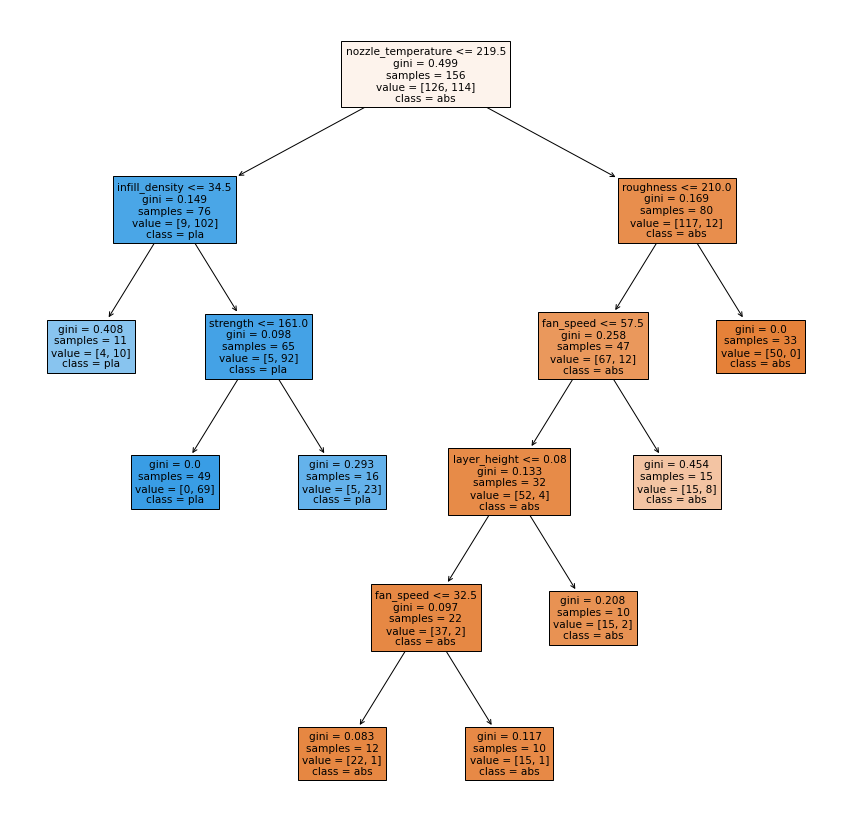

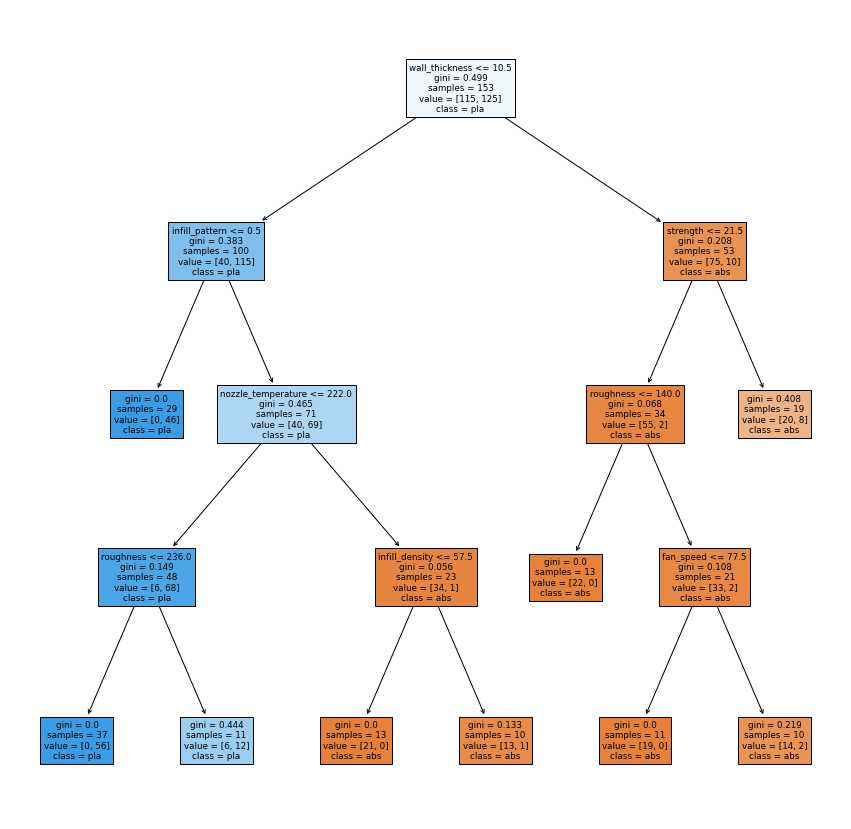

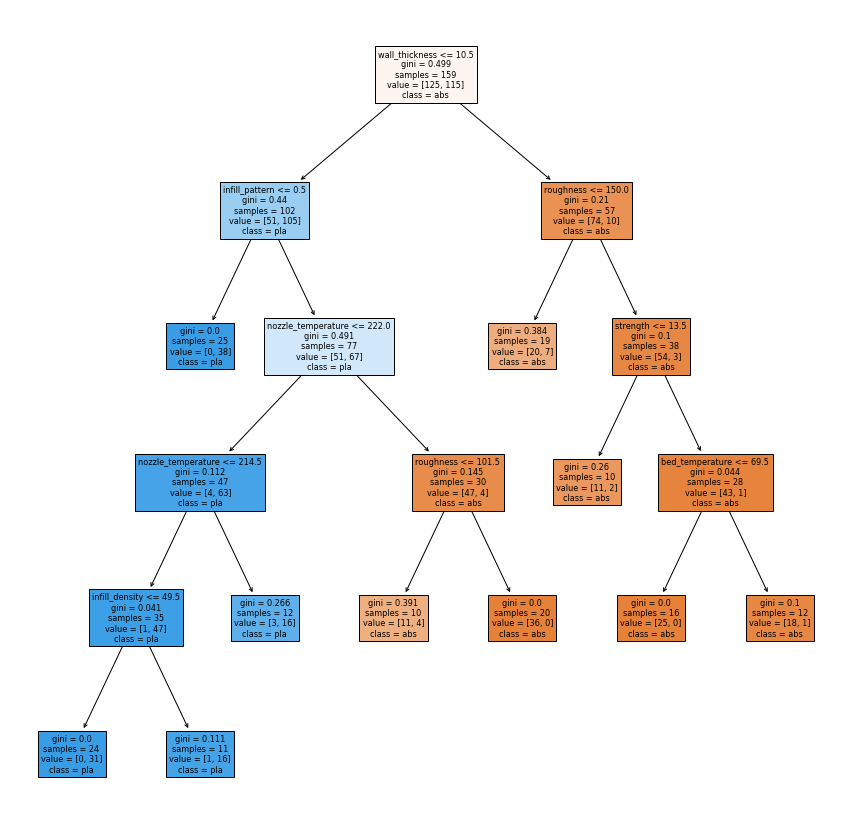

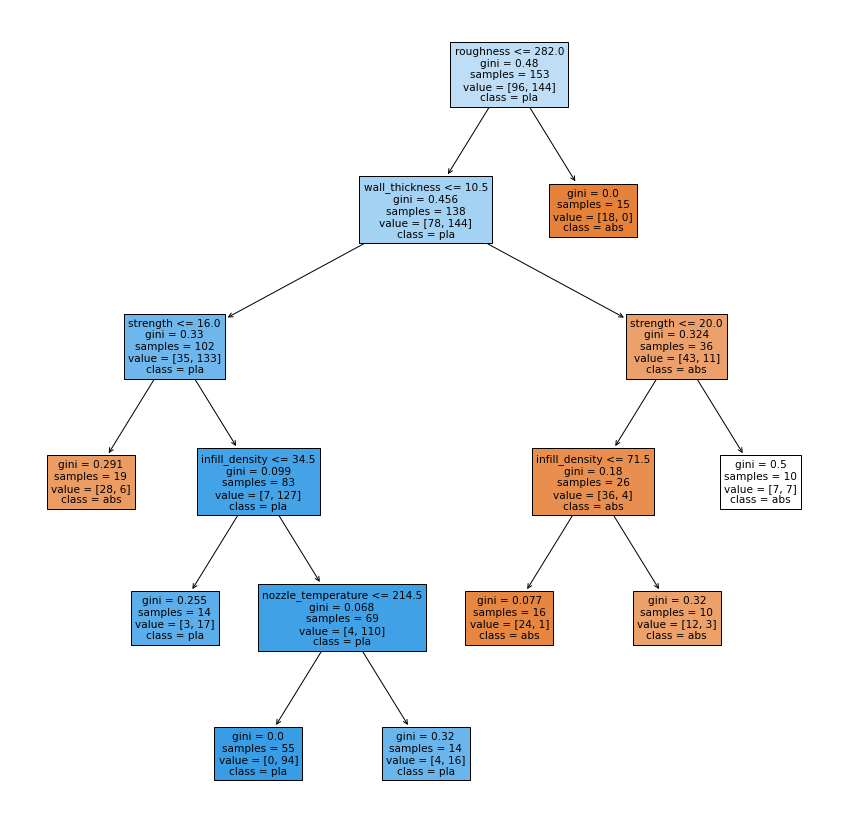

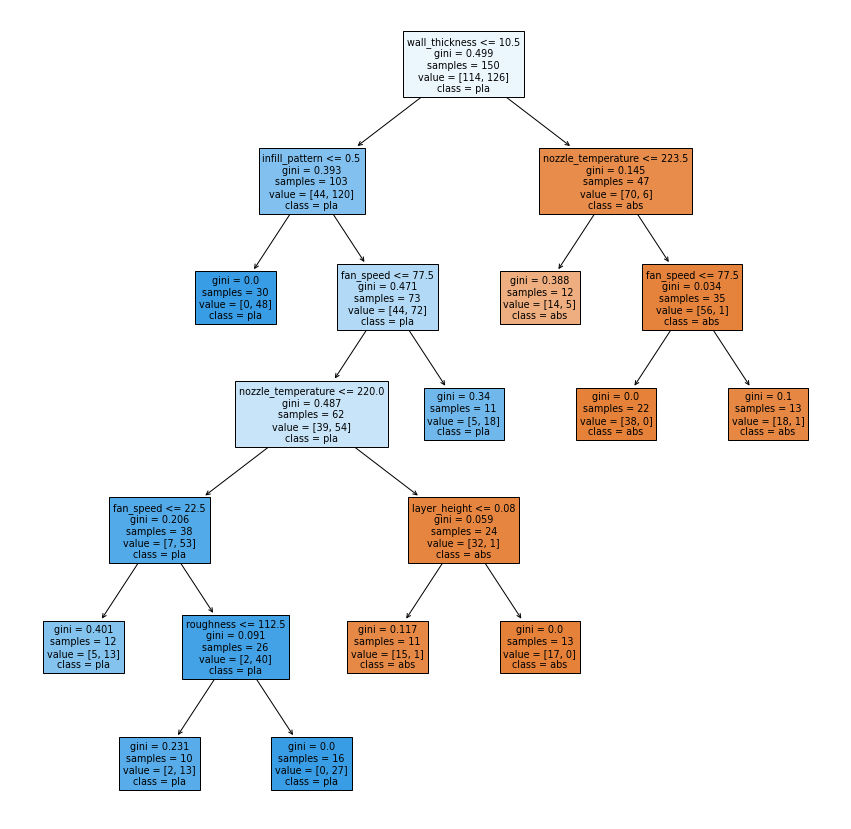

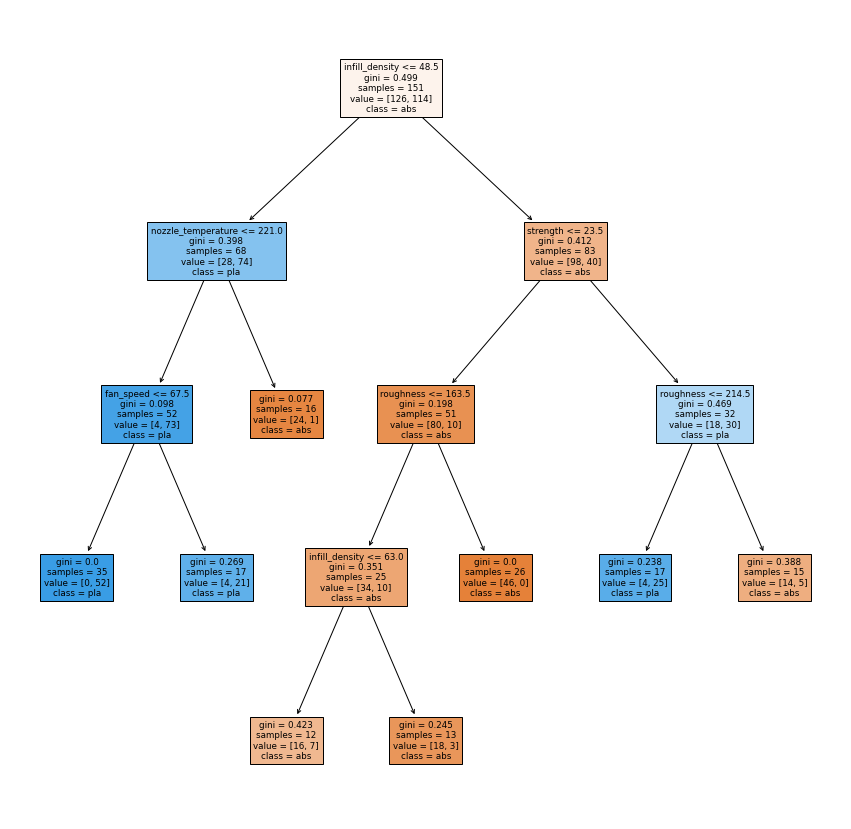

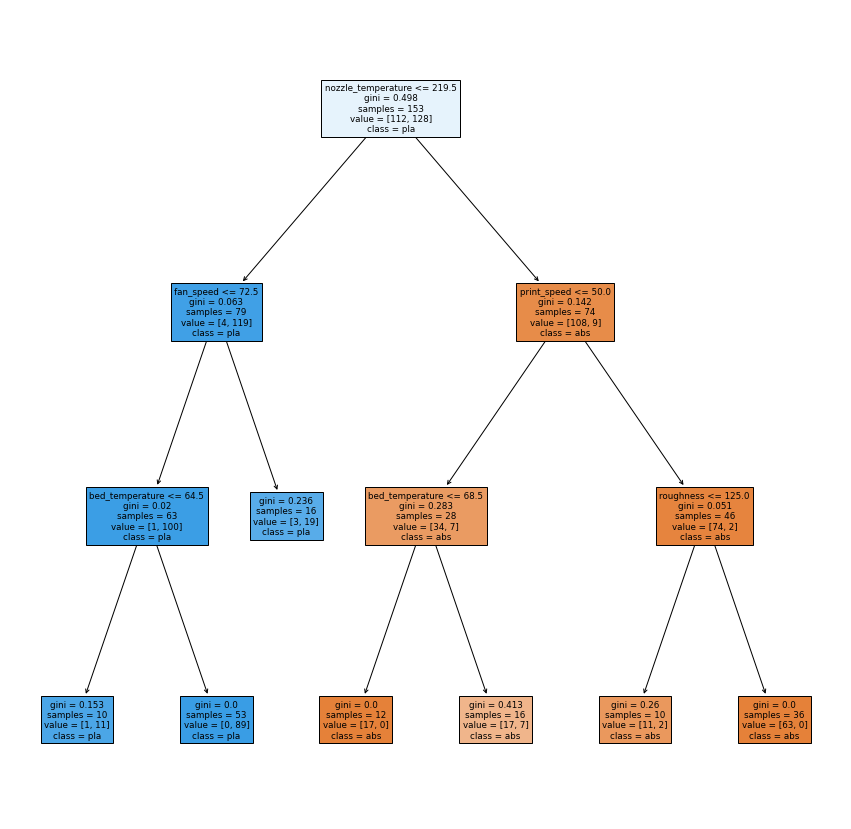

In [ ]:
# visualisation
for i in range(40):
    fig = plt.figure(figsize=(15,15))
    _ = tree.plot_tree(model.estimators_[i], 
                       feature_names=X.columns,  
                       class_names=['abs','pla'],
                       filled=True)
    plt.show()

In [ ]:
print(classification_report(y_pred,y_test))
print("R2 Score is: ",r2_score(y_test, y_pred))